In [116]:
import pandas as pd
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
palma = pd.read_csv("data/Income_inequality_Palma_ratio.csv", encoding="latin1", sep=",")
palma["Country"] = palma["Country"].str.strip()
palma = palma.rename(columns={"2010-2017": "palma_ratio"})
world = world.replace(to_replace={"United States of America": "United States"})
world = world.loc[world["name"]!="Antarctica"]

In [117]:
palma.tail(20)

,HDI Rank,Country,palma_ratio,Unnamed: 3
132,2,Switzerland,1.2,a
133,125,Tajikistan,1.4,a
134,163,Tanzania,1.7,a
135,79,Thailand,1.5,a
136,141,Timor-Leste,1.1,a
137,167,Togo,2.2,a
138,104,Tonga,1.6,a
139,95,Tunisia,1.3,a
140,54,Turkey,2.1,a
141,..,Tuvalu,1.8,a


In [118]:
data = world.merge(palma, left_on="name", right_on="Country")

In [119]:
data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,HDI Rank,Country,palma_ratio,Unnamed: 3
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",93,Fiji,1.6,a
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",163,Tanzania,1.7,a
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",16,Canada,1.3,a
3,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",17,United States,2.0,a
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",51,Kazakhstan,1.0,a


Text(0.5, 1.0, 'Palma Ratio - 2010-2017 \n(data: HDR/UNDP --> http://hdr.undp.org/en/indicators/135206)')

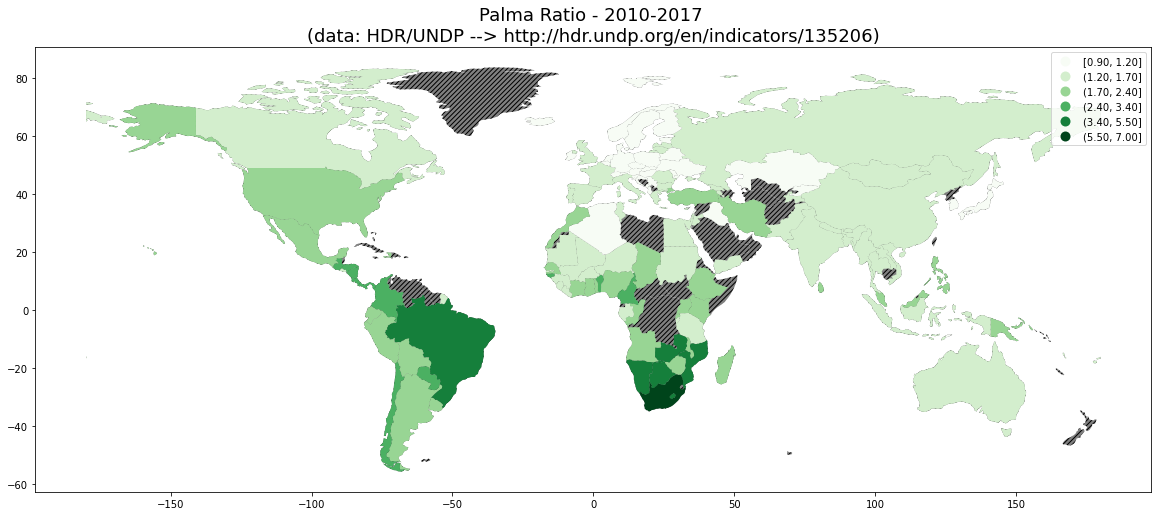

In [121]:
ax = world.plot(facecolor="grey", figsize=(20,9), hatch="/////", lw=0.01)
ax = data.plot(ax=ax, column="palma_ratio", legend=True, cmap="Greens", scheme="natural_breaks", k=6)
ax.set_title("Palma Ratio - 2010-2017 \n(data: HDR/UNDP --> http://hdr.undp.org/en/indicators/135206)", size=18)

In [107]:
world.sort_values(by="name").head(50)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
109,3045191,Asia,Armenia,ARM,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
145,9961396,Asia,Azerbaijan,AZE,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41..."


In [57]:
palma.head()

,HDI Rank,Country,2010-2017,Unnamed: 3
0,69,Albania,1.0,a
1,91,Algeria,1.0,a
2,148,Angola,2.1,a-b
3,46,Argentina,1.9,a
4,81,Armenia,1.4,a


In [58]:
palma.loc[0, "Country"]

' Albania'